# K-Means Clustering

## Importacion de las librerias

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import statsmodels.api as sm
import seaborn as sns
sns.set(style="white", font_scale = 1.4)
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}               
       


## Importacion del dataset


In [77]:
dataset = pd.read_csv('testGeneral.csv')
#dataset2 = dataset[(dataset['dia'] == 7) ]
#print(dataset2)

X = dataset.iloc[:, [2, 3]].values

In [85]:
X

array([[  0.321869, -78.209348],
       [  0.362384, -78.191308],
       [  0.277116, -78.238205],
       [  0.268882, -78.230785],
       [  0.24799 , -78.271613],
       [  0.235781, -78.266152],
       [  0.235921, -78.254992],
       [  0.245861, -78.253822],
       [  0.235014, -78.259252],
       [  0.229356, -78.26827 ],
       [  0.226684, -78.2666  ],
       [  0.231974, -78.258325],
       [  0.243185, -78.24244 ],
       [  0.241072, -78.251605],
       [  0.234425, -78.264007],
       [  0.225567, -78.265605],
       [  0.226712, -78.260773],
       [  0.226002, -78.26203 ],
       [  0.229425, -78.260797],
       [  0.230366, -78.261197],
       [  0.221021, -78.26455 ],
       [  0.22571 , -78.274385],
       [  0.224699, -78.269478],
       [  0.220243, -78.266855],
       [  0.205592, -78.245562],
       [  0.199422, -78.24043 ],
       [  0.234302, -78.264958],
       [  0.23308 , -78.268158],
       [  0.229731, -78.262545],
       [  0.223195, -78.265207],
       [  

## Aplicación del método de elbow para obtener os clusteres óptimos para la clasificación

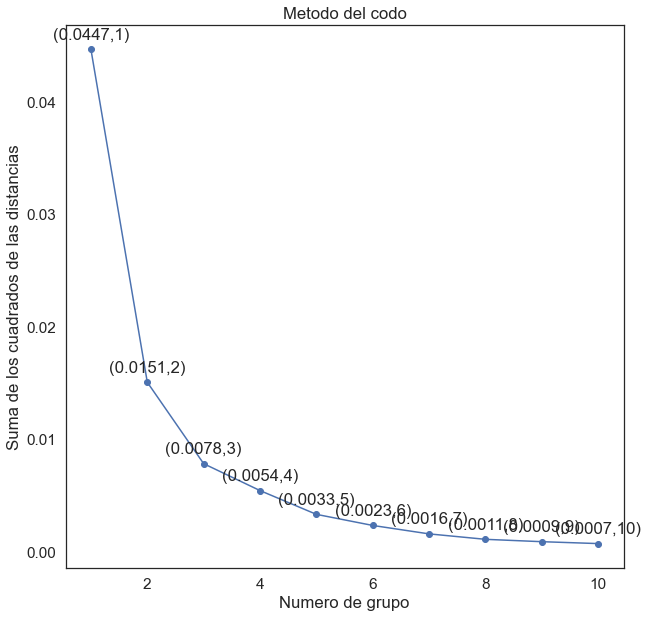

In [79]:
from sklearn.cluster import KMeans
wcss = []
#hola
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots()    
plt.plot(range(1, 11), wcss, marker="o",)

for x,y in zip(range(1, 11),wcss):

    label1 = "{:.4f}".format(y)
    label2 = "{:.0f}".format(x)
    plt.annotate('('+label1+','+label2+')', # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 

plt.title('Metodo del codo')
plt.xlabel('Numero de grupo')
plt.ylabel('Suma de los cuadrados de las distancias')

plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


## Entrenamiento del modelo de K-means con el dataset y el numero de clusters óptimos

In [80]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


## Visualización de los centroides de clusters óptimos 

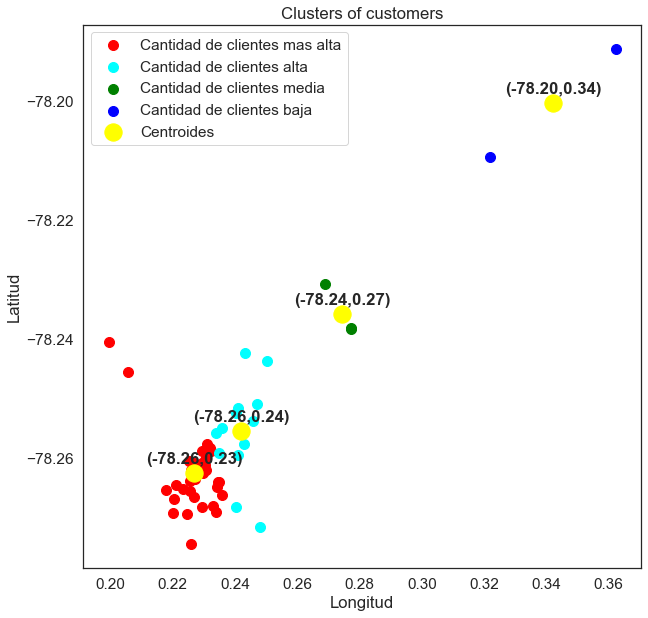

In [84]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cantidad de clientes mas alta')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cantidad de clientes alta')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cantidad de clientes media')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cantidad de clientes baja')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
for x,y in zip(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1]):
    label1 = "{:.2f}".format(y)
    label2 = "{:.2f}".format(x)
    plt.annotate('('+label1+','+label2+')', # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 weight='bold') 

plt.title('Clusters of customers')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

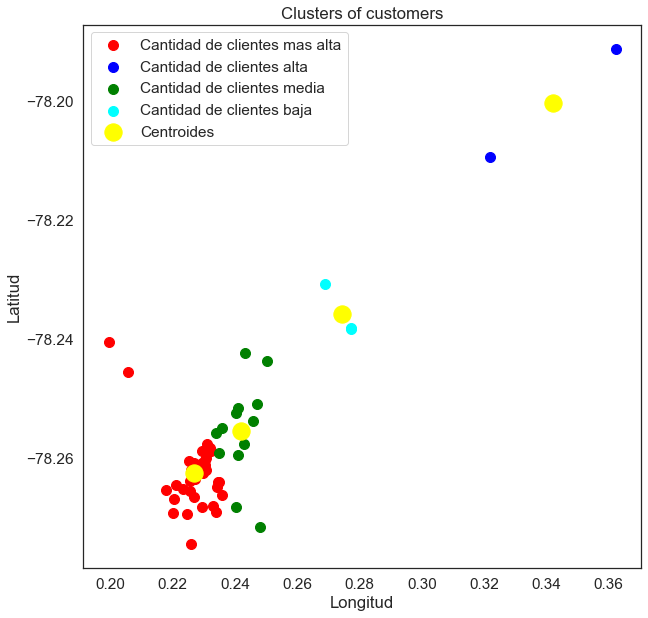

In [46]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cantidad de clientes mas alta')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cantidad de clientes alta')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cantidad de clientes media')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cantidad de clientes baja')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters of customers')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

#Extraer los clusters

In [24]:
centers = kmeans.cluster_centers_

print(centers)

#r = requests.post(url = API_ENDPOINT, data = data)


[[  0.22690025 -78.26259769]
 [  0.3421265  -78.200328  ]
 [  0.24189662 -78.25555423]
 [  0.27445267 -78.23579667]]
